In [2]:
import numpy as np
import scipy

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

import time
import datetime

In [4]:
stock = np.loadtxt('../data/AAPL_020102_180930_minute.txt')
fs = 1.

ValueError: could not convert string to float: '{\\rtf1\\ansi\\ansicpg1252\\cocoartf1561\\cocoasubrtf600'

In [35]:
st_time = 1509500000
i_st =  np.argmax(stock[:,0]>st_time)
end_time = 1516000000
i_end =  np.argmax(stock[:,0]>end_time)


price = stock[i_st:i_end, 2]
volume = stock[i_st:i_end,1]
unxtime = (stock[i_st:i_end,0] - st_time)/60

In [38]:
print 'Approx days:', (price.shape[0]/60.)/6.5

Approx days: 49.5384615385


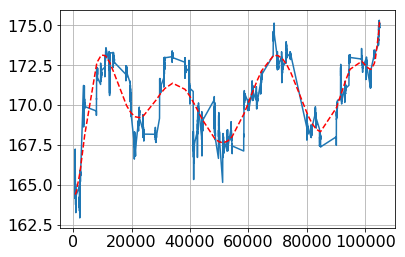

In [37]:
plt.plot(unxtime, price)
p = np.polyfit(unxtime, price, 10)
price_pol = np.polyval(p, unxtime)
plt.plot(unxtime, price_pol, '--r')
plt.grid()

In [13]:
freq = np.fft.rfftfreq(price.shape[0], 1/fs)

i_fmax = np.argmin(freq < 1/120.)
freq = freq[:i_fmax]

price_ft_raw = np.real(np.fft.rfft(price, norm='ortho'))
price_ft = price_ft_raw[:i_fmax]

In [15]:
# i_pk = np.array(scipy.signal.find_peaks_cwt(price_ft, widths=np.array([4])))
i_pk = np.array(scipy.signal.argrelextrema(price_ft, np.greater))[0]
# i_pk = np.

print i_pk.shape

AttributeError: 'module' object has no attribute 'signal'

NameError: name 'i_pk' is not defined

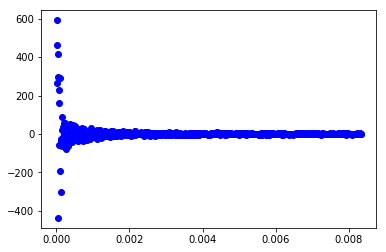

In [16]:
plt.plot(freq[1:], price_ft[1:], 'ob')
plt.plot(freq[i_pk], price_ft[i_pk], 'or')
plt.xlabel(r'Frequency $[min^{-1}]$')
plt.ylabel(r'$Re\{\hat{f}\}$')
plt.yscale('log')
plt.xscale('log')

In [ ]:
i_pk = i_pk[0]
print i_pk
print freq[i_pk]

price_ft_purged = np.zeros_like(price_ft_raw)
price_ft_purged[i_pk] = price_ft[i_pk]
price_ft_purged[0] = price_ft_raw[0]
print price_ft_purged[price_ft_purged > 0]

In [ ]:
price_puged = np.fft.irfft(price_ft_purged, norm='ortho')

In [ ]:
plt.plot(time, price)
plt.plot(time, price_puged, '--r')